<a href="https://colab.research.google.com/github/mekabuko/DS_TIL/blob/main/Aidemy_Option/22_%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E4%B8%89%E7%9B%AE%E4%B8%A6%E3%81%B9/22_%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E4%B8%89%E7%9B%AE%E4%B8%A6%E3%81%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode: 10, 2 wins, 2 draws, 6 loses
Episode: 20, 2 wins, 5 draws, 3 loses
Episode: 30, 4 wins, 2 draws, 4 loses
Episode: 40, 2 wins, 1 draws, 7 loses
Episode: 50, 3 wins, 1 draws, 6 loses
Episode: 60, 1 wins, 1 draws, 8 loses
Episode: 70, 0 wins, 3 draws, 7 loses
Episode: 80, 4 wins, 1 draws, 5 loses
Episode: 90, 2 wins, 4 draws, 4 loses
Episode: 100, 2 wins, 3 draws, 5 loses


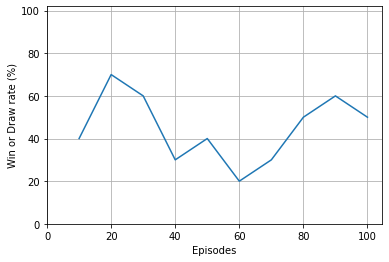

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Environment():    
    def start(self):
        self.Map = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0])
        return self.Map
    
    def terminal(self, Map, num_player):
        vhd = []
        for i in range(3):
            vhd.append(Map[i+0] * Map[i+3] * Map[i+6])
            vhd.append(Map[0+3*i] * Map[1+3*i] * Map[2+3*i])
        vhd.append(Map[0] * Map[4] * Map[8])
        vhd.append(Map[2] * Map[4] * Map[6])    
        vhd = np.array(vhd)
        vhd -= num_player**3
        done = (vhd.prod() == 0)
        return done 
    
    def step(self, action):
        reward = 0.0
        
        # Agentが打ちます
        self.Map[action] = 1
        done = self.terminal(self.Map, num_player=1) 
        
        # 先手(Agent)が勝ちの場合
        if done:
            reward = 1.0
        #「勝ちが決まらない」かつ「9マス埋まっている」場合、引き分けで終了
        elif self.Map.prod() != 0:
            reward = -0.5
            done = True
        # 先手が打って終了しなかった場合、Enermyが打ちます
        else:                      
            # get_action_Enemy関数から、actionを取得します
            action = self.get_action_Enemy(self.Map)
            self.Map[action] = 2
            done = self.terminal(self.Map, num_player=2) 
            if done:
                reward = -1.0
        return self.Map, reward, done
    
    def get_action_Enemy(self,Map):
        # 空白取得
        empty_Map_list = np.where(Map == 0)[0]
        
        if np.random.rand() <= 0.25:
            action = np.random.choice(empty_Map_list, 1)
        else:
            #Agentが次の一手を打った場合に勝利するかどうか
            done_future_list1 = []
            #Enemyが次の一手を打った場合に勝利するかどうか
            done_future_list2 = []
            for j in range(len(empty_Map_list)):
                future_Map1 = np.copy(Map)
                future_Map2 = np.copy(Map)
                future_Map1[empty_Map_list[j]] = 1
                future_Map2[empty_Map_list[j]] = 2                
                done_future_list1.append(self.terminal(future_Map1,num_player=1))
                done_future_list2.append(self.terminal(future_Map2,num_player=2))
            done_future_list1 = np.array(done_future_list1)  
            done_future_list2 = np.array(done_future_list2) 
            
            # done_future_list2にTrueが存在する場合
            if len(np.where(done_future_list2==True)[0]) > 0:
                # done_future_list2からTrueのactionを抜き出し
                temp_list = np.where(done_future_list2 == True)[0]
                action = empty_Map_list[np.random.choice(temp_list)]
            # done_future_list1にTrueが存在する場合
            elif len(np.where(done_future_list1==True)[0]) > 0:
                # done_future_list1からTrueのactionを抜き出し
                temp_list = np.where(done_future_list1 == True)[0]
                action = empty_Map_list[np.random.choice(temp_list)]
            else:
                action = np.random.choice(empty_Map_list, 1)
            
        return action

# 初期設定
np.random.seed(0)
episodes = 100
result_interval= 10
total_win, total_draw, total_lose = 0,0,0

# インスタンス作成
env=Environment()

#グラフ用のデータ格納リストを宣言
episodes_list = []
win_or_draw_list = []

for num_episode in range(episodes):
    Map = env.start()
    done = False
    step = 1
    while not done:
        # actionをここで指定し、最終的にはactionを計算して返す関数に置き換えます
        action = np.random.choice(np.where(Map == 0)[0])
        new_Map,reward,done = env.step(action)
        Map = np.copy(new_Map)
        step += 1
    
    # 結果を記録するための処理です
    if reward == 1.0:
            total_win += 1
    elif reward == -0.5:
            total_draw += 1
    elif reward == -1.0:
            total_lose += 1
    
    if (num_episode+1)%result_interval == 0:
        print('Episode: {}, {} wins, {} draws, {} loses'.format((num_episode+1), total_win, total_draw, total_lose))
        
        # ファイルに出力(Web上ではファイルに出力できないのでコメントアウトしています。)
        with open('result.txt', 'a') as f:
            f.writelines('Episode: {}, {} wins, {} draws, {} loses'.format((num_episode+1), total_win, total_draw, total_lose) + '\n')
        #グラフ用のデータを保存
        episodes_list.append(num_episode+1)
        win_or_draw_list.append((total_win+total_draw)/result_interval*100)
        # 変数をリセット
        total_win, total_draw, total_lose = 0,0,0       
        

# 学習結果をグラフで出力
plt.plot(np.asarray(episodes_list), np.asarray(win_or_draw_list))
plt.xlabel('Episodes')
plt.ylabel('Win or Draw rate (%)')
plt.xlim(0,)
plt.ylim(0,102)
plt.grid(True)